In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [ "I love to eat pizza", "Pizza is my favorite food", "I prefer pasta over pizza", "I enjoy watching movies",
    "Movies are a great source of entertainment", "I like to read books", "Books expand my knowledge", "I enjoy playing sports",
    "Sports keep me active and healthy", "I love spending time with friends"]
    
print(corpus)

['I love to eat pizza', 'Pizza is my favorite food', 'I prefer pasta over pizza', 'I enjoy watching movies', 'Movies are a great source of entertainment', 'I like to read books', 'Books expand my knowledge', 'I enjoy playing sports', 'Sports keep me active and healthy', 'I love spending time with friends']


In [2]:
vec = TfidfVectorizer()
trans_out = vec.fit_transform(corpus)
trans_out

<10x35 sparse matrix of type '<class 'numpy.float64'>'
	with 44 stored elements in Compressed Sparse Row format>

In [3]:
print(vec.vocabulary)

None


In [4]:
dir(vec)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',

In [5]:
vec.get_feature_names_out()

array(['active', 'and', 'are', 'books', 'eat', 'enjoy', 'entertainment',
       'expand', 'favorite', 'food', 'friends', 'great', 'healthy', 'is',
       'keep', 'knowledge', 'like', 'love', 'me', 'movies', 'my', 'of',
       'over', 'pasta', 'pizza', 'playing', 'prefer', 'read', 'source',
       'spending', 'sports', 'time', 'to', 'watching', 'with'],
      dtype=object)

In [6]:
all_feature_names = vec.get_feature_names_out()

for word in all_feature_names:
    index = vec.vocabulary_.get(word)
    print(f'{word} {vec.idf_[index]}')

active 2.7047480922384253
and 2.7047480922384253
are 2.7047480922384253
books 2.2992829841302607
eat 2.7047480922384253
enjoy 2.2992829841302607
entertainment 2.7047480922384253
expand 2.7047480922384253
favorite 2.7047480922384253
food 2.7047480922384253
friends 2.7047480922384253
great 2.7047480922384253
healthy 2.7047480922384253
is 2.7047480922384253
keep 2.7047480922384253
knowledge 2.7047480922384253
like 2.7047480922384253
love 2.2992829841302607
me 2.7047480922384253
movies 2.2992829841302607
my 2.2992829841302607
of 2.7047480922384253
over 2.7047480922384253
pasta 2.7047480922384253
pizza 2.01160091167848
playing 2.7047480922384253
prefer 2.7047480922384253
read 2.7047480922384253
source 2.7047480922384253
spending 2.7047480922384253
sports 2.2992829841302607
time 2.7047480922384253
to 2.2992829841302607
watching 2.7047480922384253
with 2.7047480922384253


In [7]:
corpus[:2]

['I love to eat pizza', 'Pizza is my favorite food']

In [8]:
trans_out.toarray()[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.57750004,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.49092779, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.42950381,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.49092779, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.48360622, 0.48360622,
        0.        , 0.        , 0.        , 0.48360622, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.41110947, 0.        , 0.        , 0.        , 0.3596722 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

# E-Commerce Text Classification

In [9]:
import pandas as pd
df = pd.read_csv('ecommerceDataset.csv')
df.head()

,Household,text
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [10]:
df.shape

(50424, 2)

In [11]:
df['Household'].value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Household, dtype: int64

In [12]:
df['Household_num'] = df.Household.map({'Household':0, 'Books':1, 'Electronics':2, 'Clothing & Accessories':3})
df.head()

,Household,text,Household_num
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,0
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",0
3,Household,Incredible Gifts India Wooden Happy Birthday U...,0
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...,0


In [13]:
df.isna().sum()

Household        0
text             1
Household_num    0
dtype: int64

In [14]:
df.dropna(axis=0,how='any',inplace=True)
df.isna().sum()

Household        0
text             0
Household_num    0
dtype: int64

In [15]:
df['Household_num'].value_counts()

0    19312
1    11820
2    10621
3     8670
Name: Household_num, dtype: int64

In [16]:
x = df['text']
x

0        SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1        SAF 'UV Textured Modern Art Print Framed' Pain...
2        SAF Flower Print Framed Painting (Synthetic, 1...
3        Incredible Gifts India Wooden Happy Birthday U...
4        Pitaara Box Romantic Venice Canvas Painting 6m...
                               ...                        
50419    Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420    CrossBeats Wave Waterproof Bluetooth Wireless ...
50421    Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422    Samsung Guru FM Plus (SM-B110E/D, Black) Colou...
50423                     Micromax Canvas Win W121 (White)
Name: text, Length: 50423, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x = tf.fit_transform(x)
x

<50423x78878 sparse matrix of type '<class 'numpy.float64'>'
	with 3568936 stored elements in Compressed Sparse Row format>

In [18]:
y = df['Household_num']
y

0        0
1        0
2        0
3        0
4        0
        ..
50419    2
50420    2
50421    2
50422    2
50423    2
Name: Household_num, Length: 50423, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2022)

In [20]:
print(x_train.shape)
print(x_train.size)
x_train

(40338, 78878)
2859357


<40338x78878 sparse matrix of type '<class 'numpy.float64'>'
	with 2859357 stored elements in Compressed Sparse Row format>

In [21]:
print(x_test.shape)
print(x_test.size)
x_test

(10085, 78878)
709579


<10085x78878 sparse matrix of type '<class 'numpy.float64'>'
	with 709579 stored elements in Compressed Sparse Row format>

In [22]:
print(y_train.shape)
print(y_train.size)
y_train.head()

(40338,)
40338


34294    3
37995    3
37808    3
41865    2
21260    1
Name: Household_num, dtype: int64

In [23]:
print(y_test.shape)
print(y_test.size)
y_test.head()

(10085,)
10085


49818    2
47405    2
745      0
47354    2
1979     0
Name: Household_num, dtype: int64

In [24]:
y_train.value_counts()

0    15492
1     9374
2     8505
3     6967
Name: Household_num, dtype: int64

In [25]:
y_test.value_counts()

0    3820
1    2446
2    2116
3    1703
Name: Household_num, dtype: int64

In [26]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train, y_train)
clf

LinearSVC()

In [27]:
clf.score(x_test, y_test)

0.9806643529995042

In [28]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 0, ..., 0, 2, 3], dtype=int64)

In [29]:
from sklearn import metrics
import matplotlib.pyplot as pt
import seaborn as sn
cm = metrics.confusion_matrix(y_test, y_test)
cm

array([[3820,    0,    0,    0],
       [   0, 2446,    0,    0],
       [   0,    0, 2116,    0],
       [   0,    0,    0, 1703]], dtype=int64)

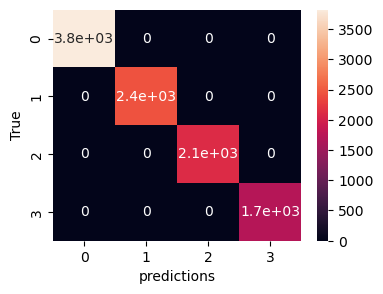

In [30]:
pt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True)
pt.xlabel('predictions')
pt.ylabel('True')
pt.show()

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3820
           1       0.98      0.98      0.98      2446
           2       0.98      0.97      0.98      2116
           3       0.98      0.99      0.99      1703

    accuracy                           0.98     10085
   macro avg       0.98      0.98      0.98     10085
weighted avg       0.98      0.98      0.98     10085



In [32]:
metrics.accuracy_score(y_pred, y_test)

0.9806643529995042